# Z-test for Proportions in Statistics 

A Z-test for proportion is a statistical hypothesis test used to determine whether the proportion of successes in a sample is significantly different from a hypothesized population proportion. 

**Note**: It is particularly useful when dealing with categorical data and binary outcomes.

## Why Use a Z-test for Proportions?

When we want to compare proportions (like the percentage of people who prefer one brand over another), we often use a statistical test. There are two common tests: the Z-test and the t-test.

The Z-test is like a shortcut that's really handy when we have a lot of data. It helps us figure out if there's a meaningful difference between proportions. We use it when we know or have a good guess about the standard deviation of the differences between proportions.

But sometimes, people use the t-test instead, even though it's not technically the right tool for the job. The t-test is meant for comparing averages, not proportions. However, when we have a lot of data, the results from a t-test end up looking pretty similar to what we'd get from a Z-test.

So, while the t-test isn't the best choice for proportions, it can still give us useful information, especially when we have a big bunch of data to work with.

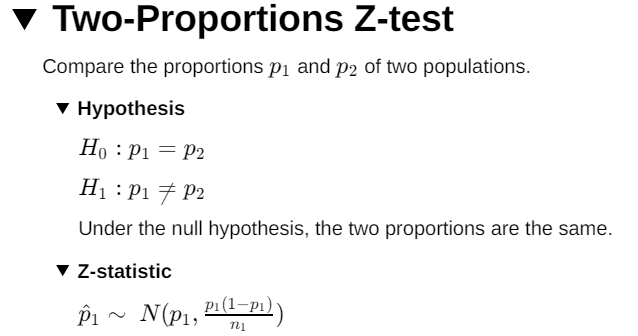
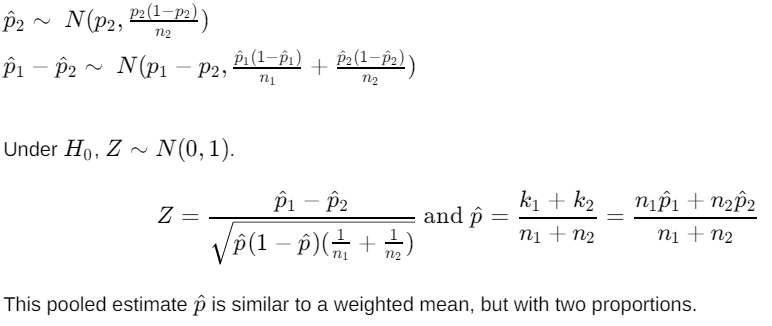

**A two proportion z test is conducted on two proportions to check if they are the same or not.**

### **Question**: 

A company wants to improve the quality of products by reducing defects and monitoring the efficiency of assembly lines. In assembly line A, there were 18 defects reported out of 200 samples while in line B, 25 defects out of 600 samples were noted. Is there a difference in the procedures at a 0.05 alpha level?

#### Formulate Hypotheses:

* Null Hypothesis (𝐻0): There is no difference in the defect rates between assembly lines A and B (𝑝𝐴 = 𝑝𝐵)


* Alternative Hypothesis (𝐻1): There is a difference in the defect rates between assembly lines A and B (𝑝𝐴 ≠ 𝑝𝐵).

### Method 1: Using `standard formula` library

In [9]:
import numpy as np
from scipy.stats import norm

In [10]:
# Sample sizes and defect counts for assembly lines A and B
defects_A = 18
samples_A = 200
defects_B = 25
samples_B = 600

In [11]:
# CalculatSample proportions
p_hat_A = defects_A / samples_A
p_hat_B = defects_B / samples_B

# Calculate pooled sample proportion
p_hat_pooled = (defects_A + defects_B) / (samples_A + samples_B)

# Calculate standard error
SE = np.sqrt(p_hat_pooled * (1 - p_hat_pooled) * (1/samples_A + 1/samples_B))

In [17]:
# Calculate test statistic
Z = (p_hat_A - p_hat_B) / SE

print("Test Statistic:", Z)
print("P-value:", 2 * (1 - norm.cdf(np.abs(Z))))

# Two-tailed test, so multiply alpha by 2
alpha = 0.05
alpha *= 2

# Determine critical value
critical_value = norm.ppf(1 - alpha/2)
print("Critical_Value:", critical_value)

Test Statistic: 2.624824049200042
P-value: 0.008669375420073067
Critical_Value: 1.6448536269514722


As 2.62 > 1.64 thus, the null hypothesis is rejected and it is concluded that there is a significant difference between the two lines.

In [13]:
# Make decision
if np.abs(Z) > critical_value:
    print("Reject the null hypothesis: There is a significant difference in defect rates between assembly lines A and B.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in defect rates between assembly lines A and B.")

Reject the null hypothesis: There is a significant difference in defect rates between assembly lines A and B.


-- This code calculates the test statistic (Z) and compares it with the critical value for a two-tailed test at a significance level of 0.05. 

* If the absolute value of the test statistic exceeds the critical value, we reject the null hypothesis and conclude that there is a significant difference in defect rates between assembly lines A and B. 
* Otherwise, we fail to reject the null hypothesis.




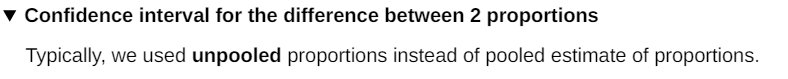
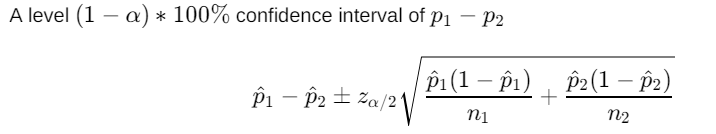

In [28]:
# Calculate confidence interval for the difference in proportions
margin_of_error = critical_value * SE
confidence_interval = (p_hat_A - p_hat_B - margin_of_error, p_hat_A - p_hat_B + margin_of_error)
print("Confidence Interval for the Difference in Proportions:", confidence_interval)

Confidence Interval for the Difference in Proportions: (0.023541532041150864, 0.0731251346255158)


### Method 2: Using `statsmodels` library

In [14]:
from statsmodels.stats.proportion import proportions_ztest

In [16]:
# Perform z-test for proportions

# Counts of successes (defects) in the two samples
successes = np.array([defects_A, defects_B])

# Sample sizes of the two samples
sample_sizes = np.array([samples_A, samples_B])

# Perform two-sample z-test for proportions
stat, p_value = proportions_ztest(successes, sample_sizes, alternative='two-sided')

# Print the test statistic and p-value
print("Test Statistic:", stat)
print("P-value:", p_value)

# Set significance level (alpha)
alpha = 0.05

# Compare p-value with alpha
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in defect rates between assembly lines A and B.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in defect rates between assembly lines A and B.")

print(f"P-value: {p_value:.3f}")

Test Statistic: 2.624824049200042
P-value: 0.008669375420073044
Reject the null hypothesis: There is a significant difference in defect rates between assembly lines A and B.
P-value: 0.009


-- This code performs a two-sample z-test for proportions using the `proportions_ztest` function from the `statsmodels` library. 

It then compares the obtained p-value with the significance level (alpha) to make a decision regarding the null hypothesis. 

* If the p-value is less than alpha, the null hypothesis is rejected, indicating a significant difference in defect rates between assembly lines A and B. 

* Otherwise, the null hypothesis is not rejected.

### Two-Proportion Z-test:

**Advantages:**

* Allows for comparing two proportions from independent samples, making it suitable for evaluating differences between two groups.
* Provides a direct comparison between the proportions, enabling insights into the relative differences in proportions.
* Suitable for large sample sizes, ensuring reliable results and robustness.

**Disadvantages:**

* Assumes that the sample proportions follow a normal distribution, which may not hold true for small sample sizes or when the population proportions are close to 0 or 1.
* Requires independence between samples and random sampling to ensure validity of results.
* Limited to comparing proportions from two groups, making it less suitable for comparisons involving multiple groups or factors.

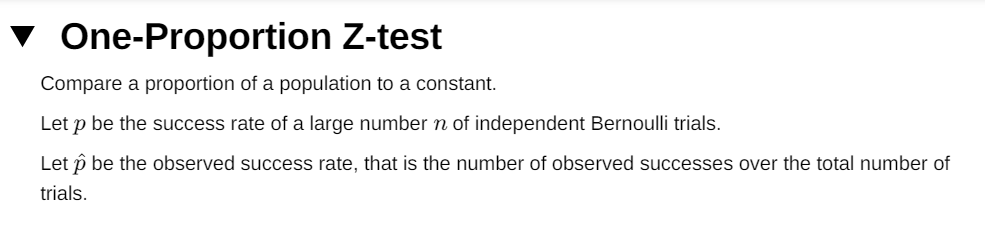
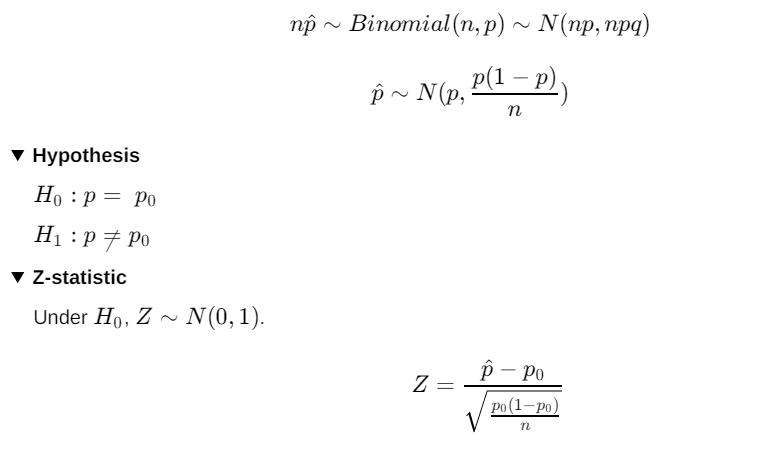

**A one proportion z test is used when there are two groups and compares the value of an observed proportion to a theoretical one.**


*The null hypothesis is that the two proportions are the same while the alternative hypothesis is that they are not the same.*


### **Question**: 

Suppose an algorithm for Ad selection is implemented, and we aim to estimate the click-through rate (𝑝) of users on the Ads selected by this algorithm. With access to data from 1000 users, the observed click-through rate is 𝑝_hat=0.2. We set a significance level of 5%.


#### Formulate Hypotheses:

* Null Hypothesis (𝐻0): The click-through rate (𝑝) is equal to 0.15.

* Alternative Hypothesis (𝐻1): The click-through rate (𝑝) is not equal to 0.15.

In [23]:
# Given data
n = 1000  # Total number of users
p_hat = 0.2  # Observed click-through rate
p0 = 0.15 #Hypothesized click-through rate (under H0)
alpha = 0.05  # Significance level

In [24]:
# Calculate the standard error
SE = np.sqrt((p_hat * (1 - p_hat)) / n)

# Calculate the z-score
Z = (p_hat - p0) / SE
print("Test Statistic (Z-score):", Z)

Test Statistic (Z-score): 3.952847075210475


In [25]:
# Calculate the critical value
critical_value = norm.ppf(1 - alpha/2)
print("Critical Value:", critical_value)

# Calculate the p-value
p_value = 2 * (1 - norm.cdf(np.abs(Z)))
print("P-value:", p_value)

# Make a decision based on the p-value
if p_value < alpha:
    print("Reject the null hypothesis: There is evidence that the click-through rate is different from 0.5.")
else:
    print("Fail to reject the null hypothesis: There is no evidence that the click-through rate is different from 0.5.")

Critical Value: 1.959963984540054
P-value: 7.72267955053696e-05
Reject the null hypothesis: There is evidence that the click-through rate is different from 0.5.


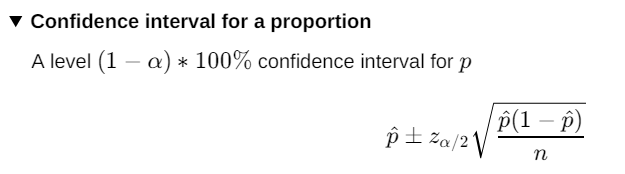

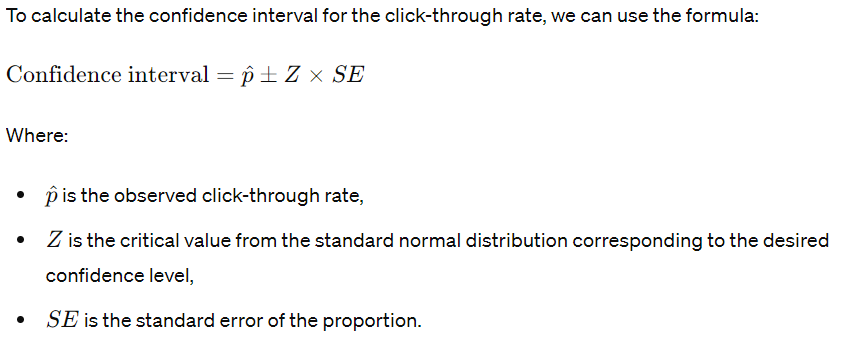

In [26]:
# Calculate confidence interval
margin_of_error = critical_value * SE
lower_bound = p_hat - margin_of_error
upper_bound = p_hat + margin_of_error

print("Confidence Interval: [{:.4f}, {:.4f}]".format(lower_bound, upper_bound))

Confidence Interval: [0.1752, 0.2248]


### One-Proportion Z-test:

**Advantages:**

* Simple to conduct and understand, making it suitable for comparing a single proportion to a known value.
* Provides a straightforward hypothesis test to determine if the observed proportion significantly differs from a specified value.
* Applicable to large sample sizes, ensuring robustness and reliability of results.

**Disadvantages:**

* Limited to comparing a single proportion to a specified value, making it less flexible for more complex comparisons.
* Assumes that the sample proportion follows a normal distribution, which may not always hold true for small sample sizes or when the population proportion is close to 0 or 1.